In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cocacola= pd.read_excel('CocaCola_Sales_Rawdata.xlsx',sheet_name='Sheet1')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<AxesSubplot:>

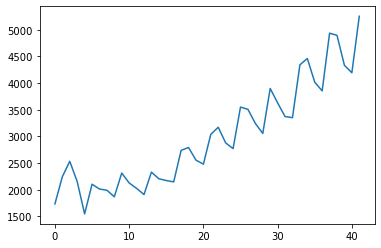

In [6]:
cocacola.Sales.plot()

In [7]:
cocacola['Quarters']= 0
cocacola['Year'] = 0
for i in range(42):
    p = cocacola["Quarter"][i]
    cocacola['Quarters'][i]= p[0:2]
    cocacola['Year'][i]= p[3:5]

In [8]:
# Prepring dummies 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(cocacola['Quarters']))
cocacola1 = pd.concat([cocacola,Quarters_Dummies],axis = 1)

In [9]:
cocacola1["t"]=np.arange(1,43)

In [10]:
cocacola1["t_squared"] = cocacola1["t"]*cocacola1["t"]
cocacola1.columns

Index(['Quarter', 'Sales', 'Quarters', 'Year', 'Q1', 'Q2', 'Q3', 'Q4', 't',
       't_squared'],
      dtype='object')

In [11]:
cocacola1["Log_Sales"]=np.log(cocacola1["Sales"])

In [12]:
cocacola1.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,Log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

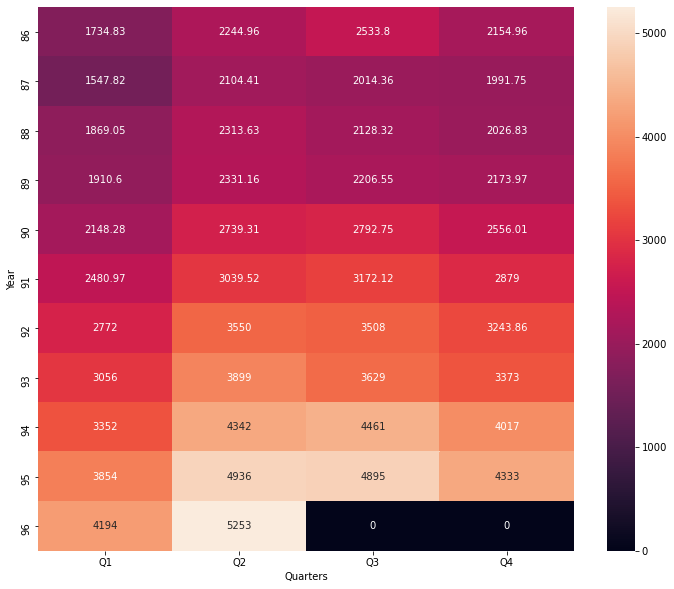

In [13]:
# visualize the data

plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data = cocacola,values="Sales",index="Year",columns="Quarters"
                             ,aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt = "g")

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

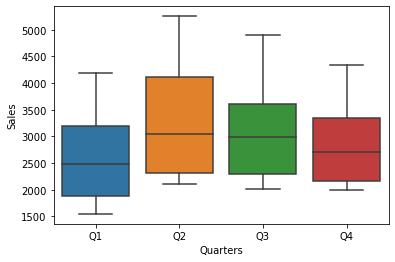

In [14]:
sns.boxplot(x="Quarters",y="Sales",data=cocacola1)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

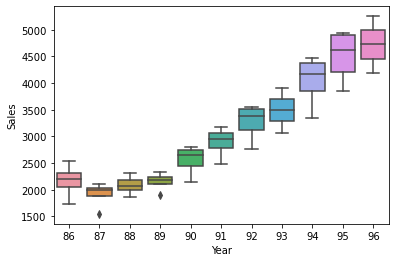

In [15]:
sns.boxplot(x="Year",y="Sales",data=cocacola1)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

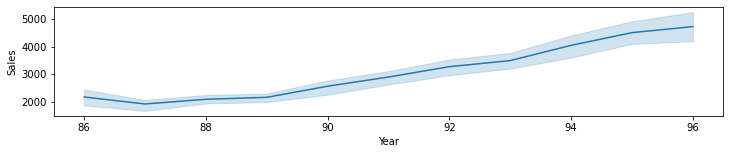

In [16]:
plt.figure(figsize=(12,2))
sns.lineplot(x='Year',y='Sales',data=cocacola)

# Splitting data

In [17]:
Train = cocacola1.head(38)
Test = cocacola1.tail(4)

In [18]:
# Linear model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.553295722396

In [19]:
# Exponential
Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.24797310672255

In [20]:
# Quadratic
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.5618351831625

In [21]:
# Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547274

In [22]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.73800719348515

In [23]:
# Multiplicative Seasonality
Mul_sea = smf.ols('Log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.3896400779627

In [24]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.5243904981481

In [25]:
#tabulating the rmse values

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,591.553296
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
3,rmse_add_sea,1860.023815
4,rmse_add_sea_quad,301.738007
5,rmse_Mult_sea,1963.389640
6,rmse_Mult_add_sea,225.524390


Model built with multiplicative seasonality and addicitve trend has less RMSE compared to all others and hence we would use that model for forecasting new data

# PREDICT WITH NEW DATA

In [26]:
t = np.arange(43,54)
t

array([43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])

In [27]:
t_squared=np.array(t*t)
t_squared

array([1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809])

In [28]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [29]:
Quarter = pd.DataFrame({'Quarter':['Q3_96','Q4_96','Q1_97','Q2_97','Q3_97','Q4_97','Q1_98','Q2_98','Q3_98','Q4_98','Q1_99']})

In [30]:
newdata = pd.concat([Quarter,df],axis=1)
newdata

,Quarter,t,t_squared
0,Q3_96,43,1849
1,Q4_96,44,1936
2,Q1_97,45,2025
3,Q2_97,46,2116
4,Q3_97,47,2209
5,Q4_97,48,2304
6,Q1_98,49,2401
7,Q2_98,50,2500
8,Q3_98,51,2601
9,Q4_98,52,2704


In [31]:
model_full= smf.ols('Sales~t',data = cocacola1).fit()
pred_new=pd.Series(model_full.predict(newdata))
pred_new

0     4569.833196
1     4643.111331
2     4716.389465
3     4789.667600
4     4862.945734
5     4936.223868
6     5009.502003
7     5082.780137
8     5156.058271
9     5229.336406
10    5302.614540
dtype: float64

In [32]:
newdata["forecasted_Sales"] = pd.Series(pred_new)
newdata

,Quarter,t,t_squared,forecasted_Sales
0,Q3_96,43,1849,4569.833196
1,Q4_96,44,1936,4643.111331
2,Q1_97,45,2025,4716.389465
3,Q2_97,46,2116,4789.667600
4,Q3_97,47,2209,4862.945734
5,Q4_97,48,2304,4936.223868
6,Q1_98,49,2401,5009.502003
7,Q2_98,50,2500,5082.780137
8,Q3_98,51,2601,5156.058271
9,Q4_98,52,2704,5229.336406


#225.52439049818733  
# multiplicative additive seasonality is best model

# FORECASTING DATA DRIVEN MODELS

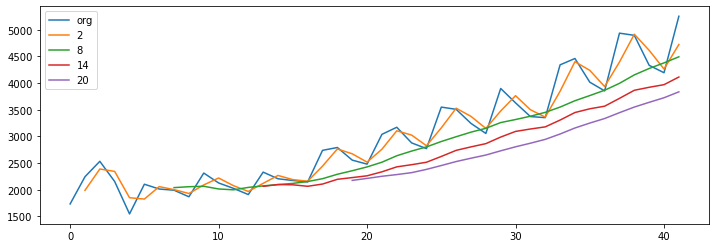

In [33]:
plt.figure(figsize=(12,4))
cocacola.Sales.plot(label="org")
for i in range(2,24,6):
    cocacola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

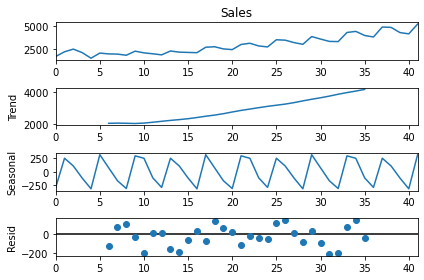

In [35]:
decompose_ts_add = seasonal_decompose(cocacola['Sales'],period=12)
decompose_ts_add.plot()
plt.show()

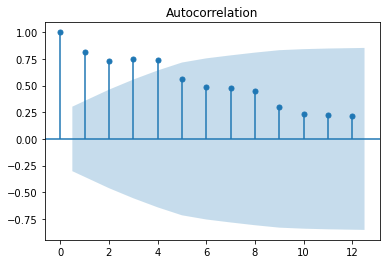

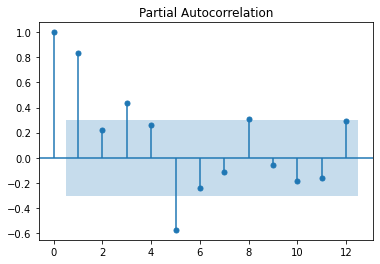

In [36]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)
tsa_plots.plot_pacf(cocacola.Sales,lags=12)
plt.show()


# Evaluation Metric MAPE

In [37]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method


In [38]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

13.169736640446311

# # Holt method

In [39]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

12.361934209550117

In [40]:
# Holt method without passing hyperparameters
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

10.506484683830497

# Holts winter exponential smoothing with additive seasonality and additive trend

In [41]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

5.236802362226293

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [42]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.7102639816863467

Model built with Holts winter exponential smoothing with multiplicative seasonality and additive trend has less MAPE compared to all others and hence we would use that model for forecasting new data

# Build the model on entire dataset

In [43]:
hwe_model_add_add = ExponentialSmoothing(cocacola1["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [44]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    4909.543702
43    4568.441892
44    4500.749538
45    5699.870828
46    5740.743055
47    5134.342651
48    4881.347528
49    6144.868499
50    6014.706235
51    5430.914035
dtype: float64